# 模型汇总与结构图

## 模型

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

# 载入 MNIST 手写阿拉伯数字资料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 特征缩放，使用常态化(Normalization)，公式 = (x - min) / (max - min)
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

# 建立模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 设定优化器(optimizer)、损失函数(loss)、效能衡量指标(metrics)的类别
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 模型训练
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)

# 评分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4577 - accuracy: 0.8685 - val_loss: 0.1421 - val_accuracy: 0.9585
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1318 - accuracy: 0.9609 - val_loss: 0.0999 - val_accuracy: 0.9696
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0903 - accuracy: 0.9728 - val_loss: 0.0908 - val_accuracy: 0.9730
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0695 - accuracy: 0.9782 - val_loss: 0.0824 - val_accuracy: 0.9746
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0520 - accuracy: 0.9836 - val_loss: 0.0804 - val_accuracy: 0.9762
loss: 0.0709
accuracy: 0.9778


## 模型汇总

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## 取得神经层资讯

In [3]:
# 以 index 取得神经层资讯
model.get_layer(index=0)

In [4]:
# 以名称取得神经层资讯
model.get_layer(name='dense_1')

In [5]:
# 取得神经层权重
model.get_layer(name='dense').weights

[<tf.Variable 'dense/kernel:0' shape=(784, 256) dtype=float32, numpy=
 array([[ 0.03047123, -0.0526238 ,  0.04259423, ...,  0.03409412,
         -0.07525571, -0.0157203 ],
        [-0.04405001, -0.07128891,  0.04534589, ..., -0.01589511,
          0.03954882, -0.0707282 ],
        [-0.03071114,  0.05893338,  0.03919258, ..., -0.07444589,
          0.04766417, -0.05851845],
        ...,
        [ 0.04877446,  0.01854303, -0.05277454, ..., -0.03570614,
          0.01188515,  0.06895107],
        [-0.00098997,  0.07013832,  0.02370678, ..., -0.05933813,
          0.04340412, -0.04992985],
        [-0.00424909,  0.00065105,  0.05183922, ...,  0.03679077,
          0.00870813,  0.0298279 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(256,) dtype=float32, numpy=
 array([ 0.01242928,  0.01564464,  0.00690343, -0.00463586,  0.10004448,
         0.12077077,  0.04730108,  0.05815266,  0.08217472, -0.07094323,
        -0.05594009, -0.05299926,  0.07807747, -0.10551706, -0.08736726,
    

## 绘制结构图

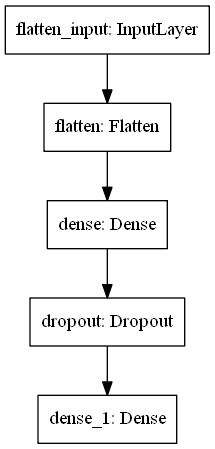

In [6]:
# 绘制结构图
tf.keras.utils.plot_model(model)

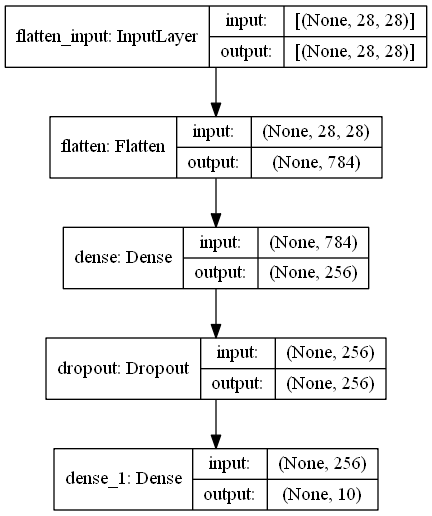

In [7]:
# 绘制结构图，show_shapes=True
tf.keras.utils.plot_model(model, show_shapes=True)

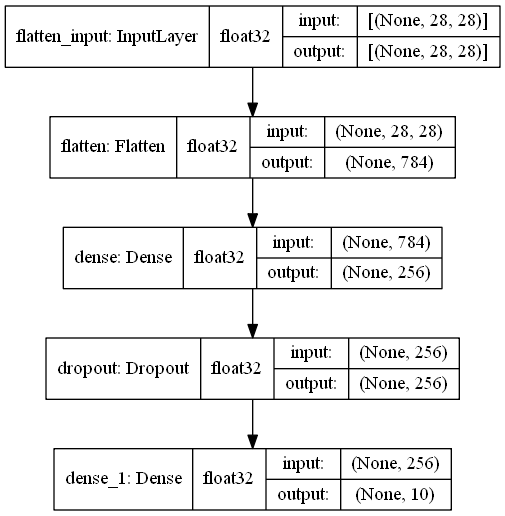

In [8]:
# 绘制结构图
# show_shapes=True：可显示输入/输出的神经元个数
# show_dtype=True：可显示输入/输出的资料型态
# to_file：可同时存档
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, 
                          to_file="model.png")

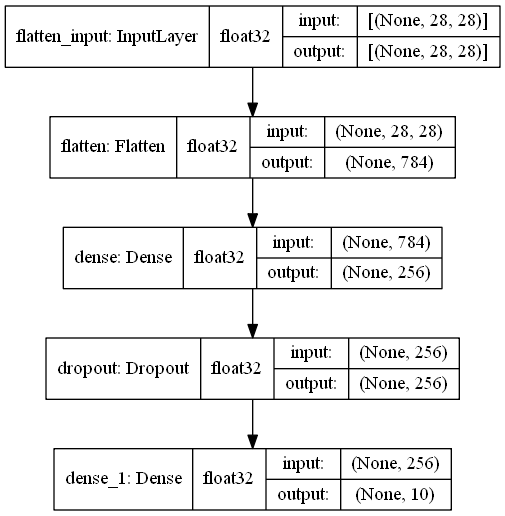

In [9]:
# 产生 dot 格式及 png 档
import pydotplus as pdp
from IPython.display import display, Image

# 产生 dot 格式
dot1 = tf.keras.utils.model_to_dot(model, show_shapes=True, show_dtype=True)
# 产生 png 档
display(Image(dot1.create_png()))

## 取得模型结构

In [10]:
# 取得模型结构
config = model.get_config()

# 载入模型结构
# Sequential model
new_model = tf.keras.Sequential.from_config(config)

# function API
# new_model = tf.keras.Model.from_config(config)

## json 格式

In [11]:
# 取得模型结构
json_config = model.to_json()

# 载入模型结构
new_model = tf.keras.models.model_from_json(json_config)

## 取得模型权重

In [12]:
# 取得模型权重
weights = model.get_weights()
weights

[array([[ 0.03047123, -0.0526238 ,  0.04259423, ...,  0.03409412,
         -0.07525571, -0.0157203 ],
        [-0.04405001, -0.07128891,  0.04534589, ..., -0.01589511,
          0.03954882, -0.0707282 ],
        [-0.03071114,  0.05893338,  0.03919258, ..., -0.07444589,
          0.04766417, -0.05851845],
        ...,
        [ 0.04877446,  0.01854303, -0.05277454, ..., -0.03570614,
          0.01188515,  0.06895107],
        [-0.00098997,  0.07013832,  0.02370678, ..., -0.05933813,
          0.04340412, -0.04992985],
        [-0.00424909,  0.00065105,  0.05183922, ...,  0.03679077,
          0.00870813,  0.0298279 ]], dtype=float32),
 array([ 0.01242928,  0.01564464,  0.00690343, -0.00463586,  0.10004448,
         0.12077077,  0.04730108,  0.05815266,  0.08217472, -0.07094323,
        -0.05594009, -0.05299926,  0.07807747, -0.10551706, -0.08736726,
         0.024023  , -0.09877392, -0.08100418, -0.07291717,  0.1136855 ,
         0.07085288,  0.05591331,  0.10240222,  0.0037421 ,  0.081

In [13]:
# Set weights
new_model.set_weights(weights)

# 设定优化器(optimizer)、损失函数(loss)、效能衡量指标(metrics)的类别
new_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# predict
score=new_model.evaluate(x_test_norm, y_test, verbose=0)
score

[0.07093210518360138, 0.9778000116348267]

## 取得模型结构时，Custom Layer 需注册

In [14]:
class CustomLayer(tf.keras.layers.Layer):
    def __init__(self, units=32, **kwargs):
        super(CustomLayer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

    def get_config(self):
        config = super(CustomLayer, self).get_config()
        config.update({"units": self.units})
        return config


def custom_activation(x):
    return tf.nn.tanh(x) ** 2


# Make a model with the CustomLayer and custom_activation
inputs = tf.keras.Input((32,))
x = CustomLayer(32)(inputs)
outputs = tf.keras.layers.Activation(custom_activation)(x)
model = tf.keras.Model(inputs, outputs)

# Retrieve the config
config = model.get_config()

# Custom Layer 需注册
custom_objects = {"CustomLayer": CustomLayer, "custom_activation": custom_activation}
with tf.keras.utils.custom_object_scope(custom_objects):
    new_model = tf.keras.Model.from_config(config)